<a href="https://colab.research.google.com/github/cfoli/AI-4-Financial-Modeling/blob/main/Lending_Risk_Modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# This project aims to predict whether a potential borrowee is high-risk or low-risk in terms of defaulting on their loan.

In [42]:
# Let's begin by importing several packages we are likely to use
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

# We will also be using several SKLearn packages specific to building ML pipelines, as well as those used in
# generating and fitting our models. We will import them here, too.
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import log_loss, confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV, train_test_split, StratifiedKFold

import matplotlib.pyplot as plt
import seaborn as sns

In [43]:

def plot_confusion_matrix(y_true, y_pred, model_name, col_map='RdPu'):
    mtx = confusion_matrix(y_true, y_pred)
    fig, ax = plt.subplots(figsize=(6,6))
    sns.heatmap(mtx, annot=True, fmt='d', linewidths=.75,  cbar=False, ax=ax,cmap=col_map,linecolor='white')

    plt.ylabel('true label', fontsize=14)
    plt.xlabel('predicted label', fontsize=14)
    plt.title(f'Confusion Matrix: {model_name} Model', fontsize=16)
    plt.show()



In [44]:
data = pd.read_csv('/content/drive/Shareddrives/AI for Financial Modeling Group 6/Module 3/Training Data.csv')

data

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
251995,251996,8154883,43,13,single,rented,no,Surgeon,Kolkata,West_Bengal,6,11,0
251996,251997,2843572,26,10,single,rented,no,Army_officer,Rewa,Madhya_Pradesh,6,11,0
251997,251998,4522448,46,7,single,rented,no,Design_Engineer,Kalyan-Dombivli,Maharashtra,7,12,0
251998,251999,6507128,45,0,single,rented,no,Graphic_Designer,Pondicherry,Puducherry,0,10,0


In [45]:

train_data, test_data = train_test_split(data, test_size = 0.3, random_state=1234)

In [46]:
# Now we will separate both the train and test datasets into X and y subsets
y_train = train_data['Risk_Flag']
X_train = train_data.drop(columns=['Risk_Flag', 'Id'], axis=1, inplace=False)

X_train_copy = X_train.copy(deep=True)
y_train_copy = y_train.copy(deep=True)

y_test = test_data['Risk_Flag']
X_test = test_data.drop(columns=['Risk_Flag', 'Id'], axis=1, inplace=False)

X_test_copy = X_test.copy(deep=True)
y_test_copy = y_test.copy(deep=True)

In [9]:
# View the new X_train dataset to ensure your transformations were enacted correctly
X_train.head(5)

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS
211149,5965932,74,3,single,rented,no,Army_officer,Giridih,Jharkhand,3,13
228963,8758853,43,14,single,rented,yes,Politician,Uluberia,West_Bengal,5,10
192302,1389018,55,18,single,rented,no,Microbiologist,Vellore,Tamil_Nadu,9,11
6961,7855403,35,0,single,rented,yes,Fashion_Designer,Bhilwara,Rajasthan,0,10
27414,414060,64,16,single,norent_noown,no,Financial_Analyst,Kadapa[23],Andhra_Pradesh,14,11


# Distribution of Feature Types

---



<ipython-input-47-94ee6965a221>:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  plt.pie(dtype_counts, labels=dtype_counts.index.astype(str), autopct='%1.1f%%', colors=plt.cm.get_cmap('Pastel1', len(dtype_counts)).colors)


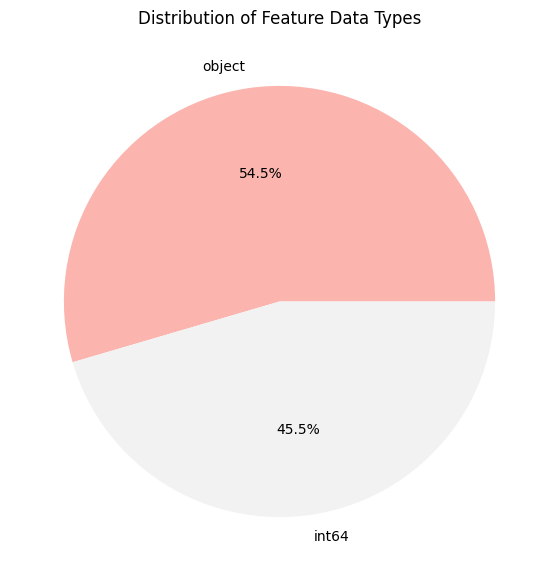

In [47]:
import matplotlib.pyplot as plt
dtype_counts = X_train.dtypes.value_counts()

# Plot Pie Chart
plt.figure(figsize=(7, 7))
plt.pie(dtype_counts, labels=dtype_counts.index.astype(str), autopct='%1.1f%%', colors=plt.cm.get_cmap('Pastel1', len(dtype_counts)).colors)
plt.title('Distribution of Feature Data Types')
plt.show()


# Distribution of Class Samples

---

<ipython-input-48-2741306f55d8>:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  plt.pie(class_counts, labels=class_counts.index.astype(str), autopct='%1.1f%%', colors=plt.cm.get_cmap('Pastel1', len(class_counts)).colors)


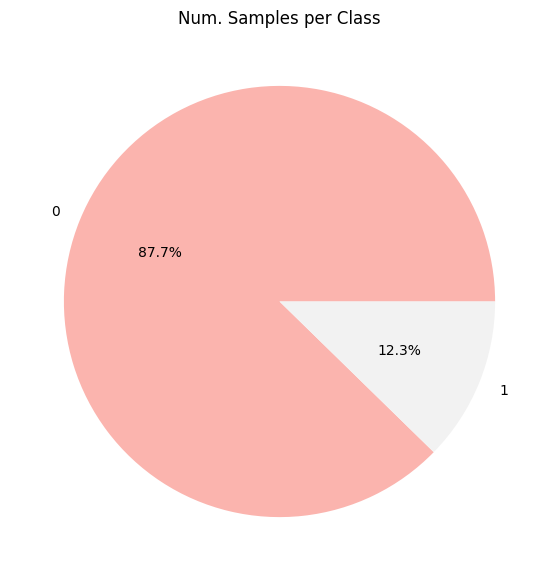

In [48]:
import matplotlib.pyplot as plt
class_counts = y_train.value_counts()

# Plot Pie Chart
plt.figure(figsize=(7, 7))
plt.pie(class_counts, labels=class_counts.index.astype(str), autopct='%1.1f%%', colors=plt.cm.get_cmap('Pastel1', len(class_counts)).colors)
plt.title('Num. Samples per Class')
plt.show()


## Calculate Number of Missing Values per Feature

---





In [49]:
# Calculate missing values
missing_values     = X_train.isnull().sum()
print("Number of missing values per feature")
print(missing_values)


Number of missing values per feature
Income               0
Age                  0
Experience           0
Married/Single       0
House_Ownership      0
Car_Ownership        0
Profession           0
CITY                 0
STATE                0
CURRENT_JOB_YRS      0
CURRENT_HOUSE_YRS    0
dtype: int64


# Box Plots of Numeric Feature Distributions

---



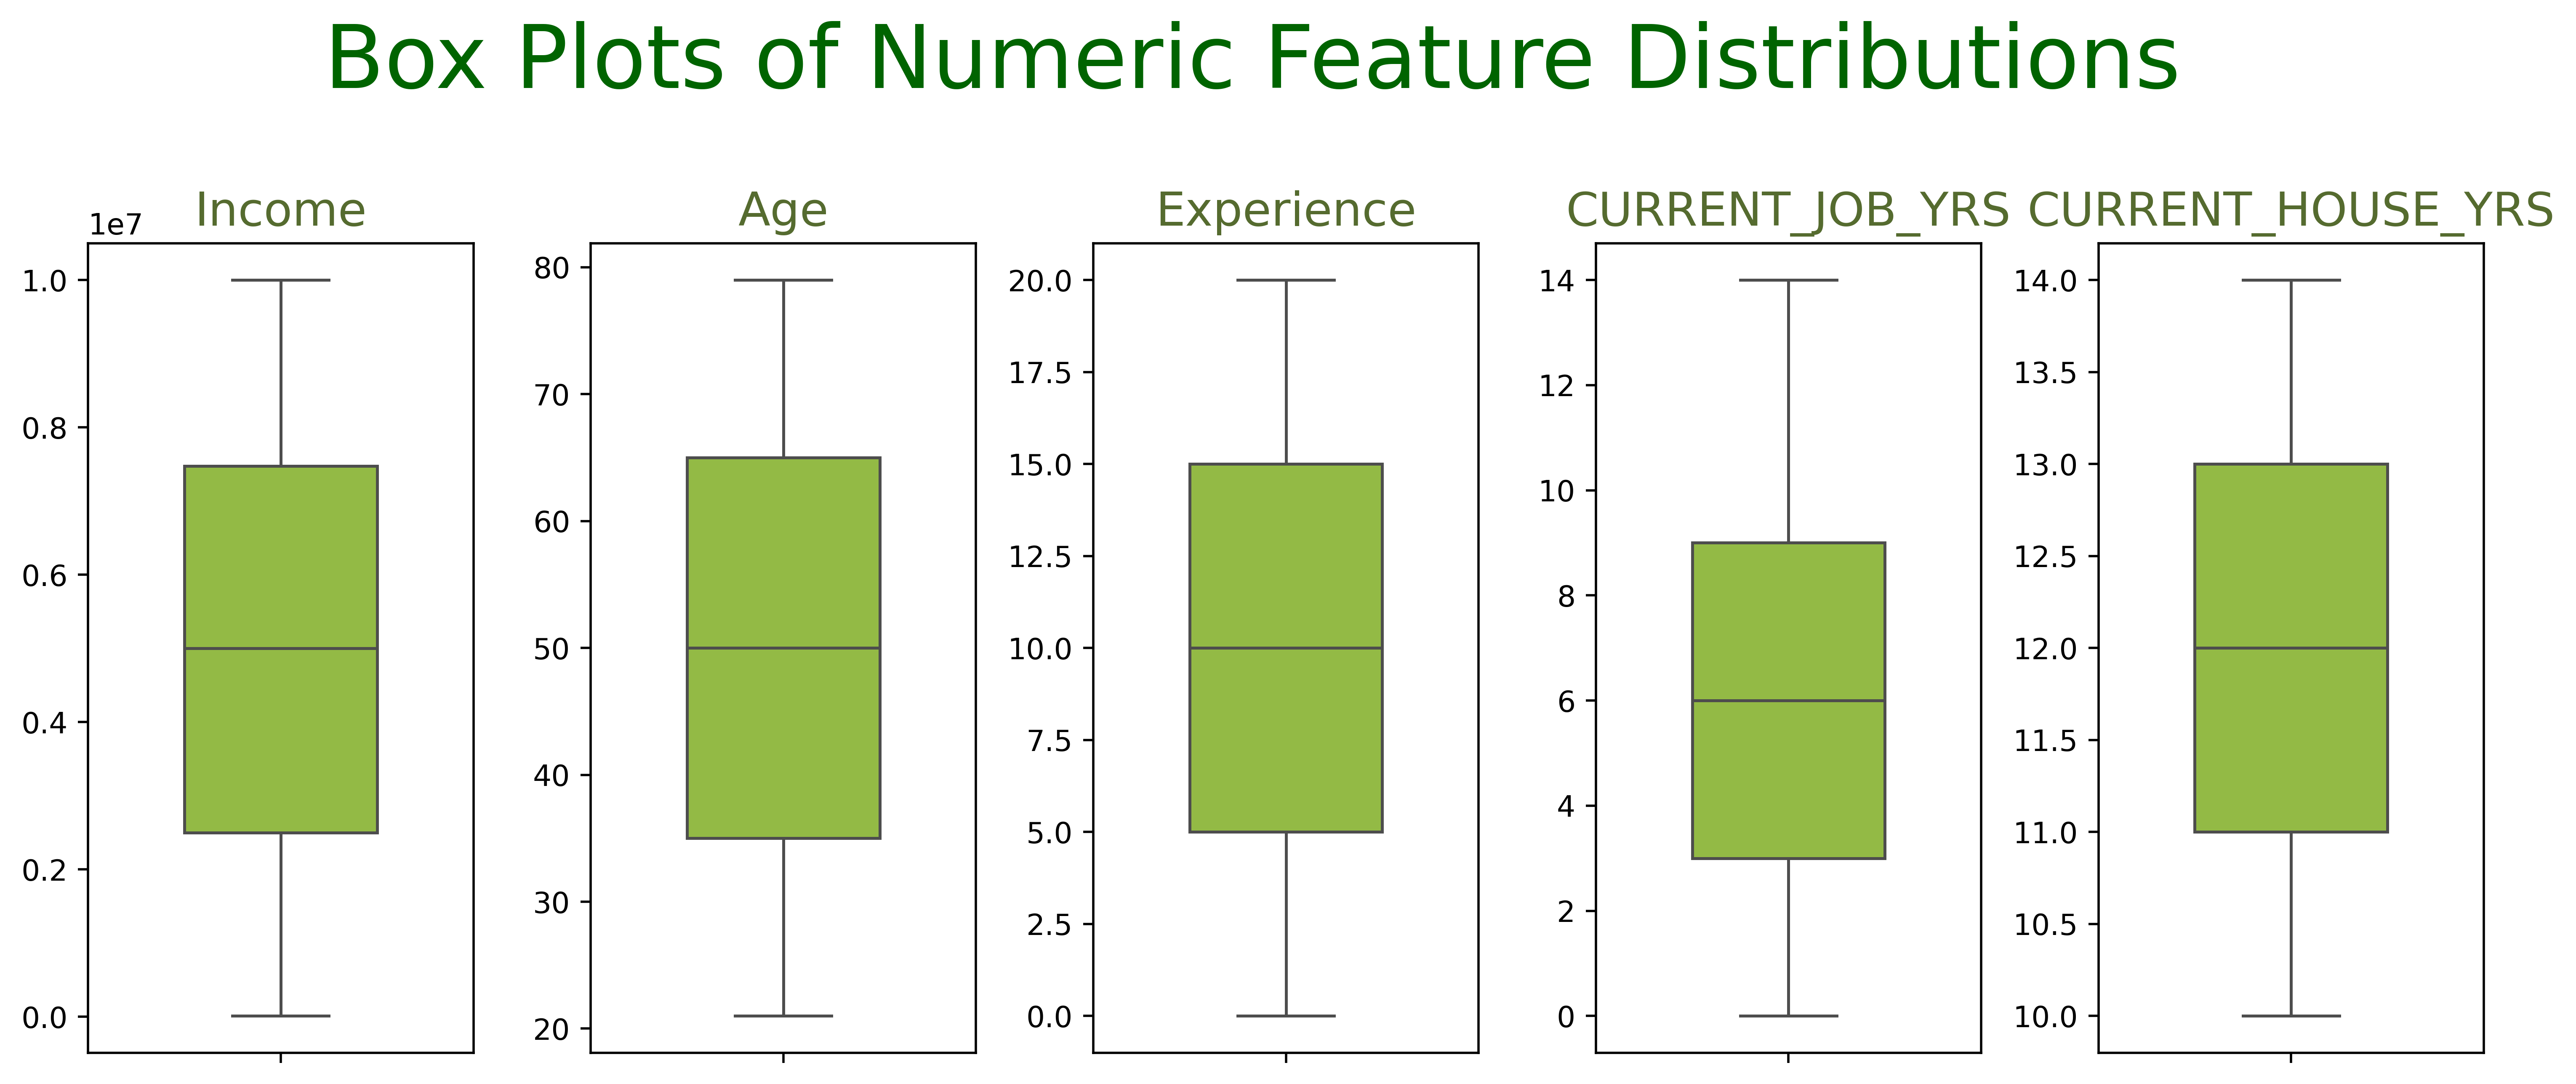

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_features = X_train.select_dtypes(include=[np.number]).columns.tolist()

fig, axes = plt.subplots(1, 5, figsize=(12, 5),dpi=500)
axes = axes.flatten()

# Generate box plots for each numeric feature
for i, feature in enumerate(numeric_features):
  sns.boxplot(y=X_train[feature], width=0.5, ax=axes[i],color='yellowgreen')
  axes[i].set_title(feature,c='darkolivegreen', fontsize=16)
  axes[i].set_ylabel("")

plt.suptitle('Box Plots of Numeric Feature Distributions',fontsize=30, color='darkgreen',y=1.02)
plt.tight_layout()
plt.show()


# Plot Correlation between Features

---



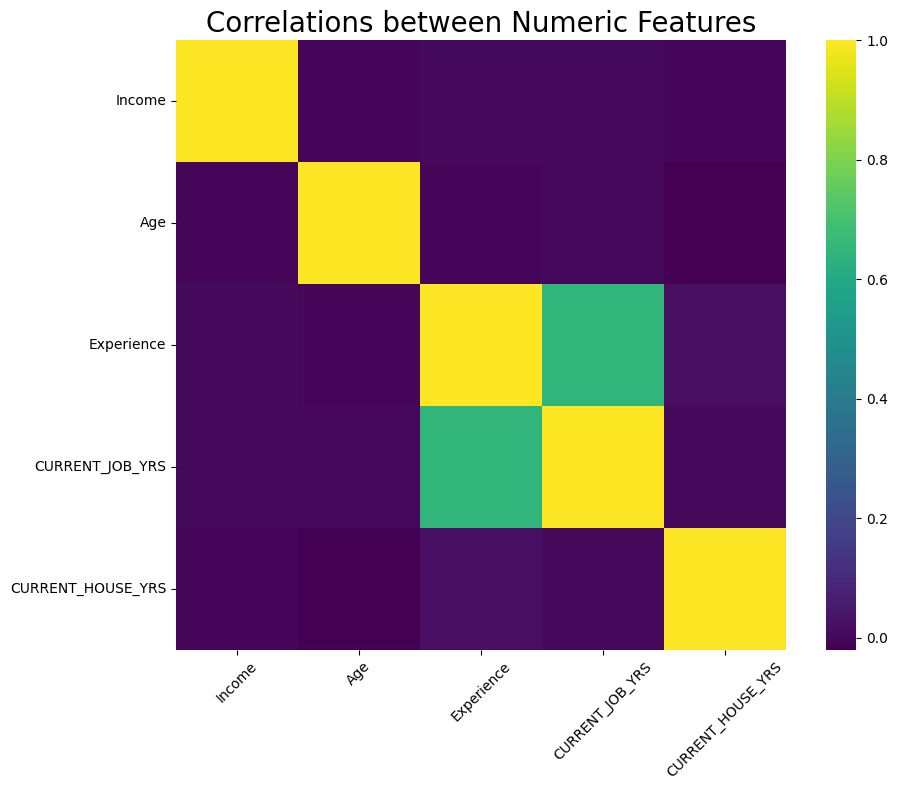

In [14]:
import seaborn as sns

plt.figure(figsize=(10, 8))
corr_mat = X_train.corr(numeric_only=True)
sns.heatmap(corr_mat,square=True, cmap='viridis')
plt.title('Correlations between Numeric Features',fontsize=20)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [50]:
numeric_feature_names = X_train.select_dtypes(include=[np.number]).columns.tolist()
numeric_feature_names


['Income', 'Age', 'Experience', 'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS']

# Categorical Feature Cardinality

---



In [51]:
# Names of Categorical Features
cat_feature_names = X_train.select_dtypes(include=object).columns.tolist()
cat_feature_names


['Married/Single',
 'House_Ownership',
 'Car_Ownership',
 'Profession',
 'CITY',
 'STATE']

In [52]:
# Number of Unique Categories per Categorical Feature
X_train[cat_feature_names].nunique()

,0
Married/Single,2
House_Ownership,3
Car_Ownership,2
Profession,51
CITY,317
STATE,29


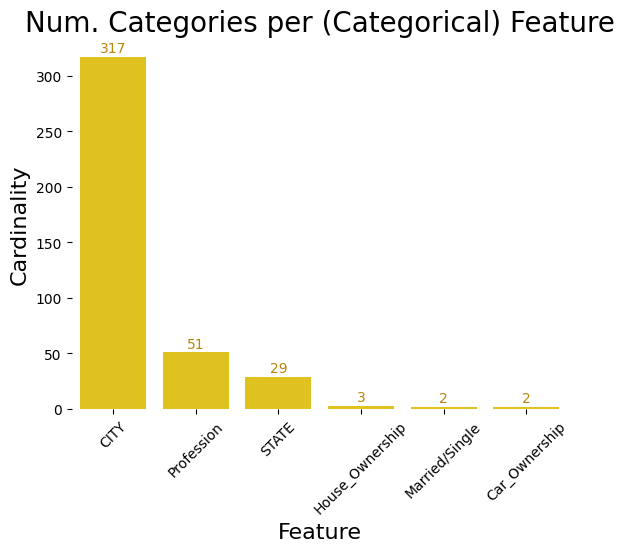

In [53]:
# Sort categorical features by ordinality
cat_cardinality = X_train[cat_feature_names].nunique().sort_values(ascending=False)

# Plot ordinality for all categorical features
plt.figure()
sns.barplot(x=cat_cardinality.index, y=cat_cardinality.values, order=cat_cardinality.index, color='gold')
plt.xticks(rotation=45)
plt.ylabel("Cardinality",fontsize=16)
plt.xlabel("Feature",fontsize=16)
plt.title("Num. Categories per (Categorical) Feature",fontsize=20)
plt.gca().spines[:].set_visible(False)

# Show labels on bars
for i, value in enumerate(cat_cardinality.values):
  plt.text(i, value + 4, f"{value}", ha="center", fontsize=10, color='darkgoldenrod')

plt.show()

# Pipeline for Numeric Features

---



In [54]:
X_train = X_train_copy.copy()
y_train = y_train_copy.copy()

X_test  = X_test_copy.copy()
y_test  = y_test_copy.copy()

In [55]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer

num_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),  # Handle missing values
    ('scaler', StandardScaler())  # Standardize numeric data
])


# Pipeline for Low Cardinality Features

---



In [56]:

cat_pipeline_lccf = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Handle missing values
    ("encoder", OneHotEncoder(handle_unknown="ignore"))  # Standardize numeric data
])


# Pipeline for High Cardinality Features

---



In [57]:
# Custom column transformer for performing target encoding on high cardinality categorical features
# target encoding replaces categorical values with the probability of the target being 1 given that category

# !pip install category_encoders

from category_encoders import TargetEncoder
from sklearn.base import BaseEstimator, TransformerMixin

class TargetEncoderTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, cols=None):
        self.cols = cols
        self.encoder = TargetEncoder(cols=cols)

    def fit(self, X, y=None):
        self.encoder.fit(X, y)
        return self

    def transform(self, X):
        return self.encoder.transform(X)

    # Add the get_feature_names_out method
    def get_feature_names_out(self, input_features=None):
        return self.cols  # Return the original feature names

cat_pipeline_hccf = TargetEncoderTransformer(cols=['Profession','STATE','CITY'])  # Target encode categorical features

# encoder = TargetEncoder(cols=['Profession','STATE','CITY'])
# X_train_encoded = encoder.fit_transform(X_train, y_train)


# Unified Preprocessor

---



In [58]:
low_cardinality_features  = ['House_Ownership','Married/Single','Car_Ownership']
high_cardinality_features = ['Profession','STATE','CITY']
all_categorical_features  = low_cardinality_features + high_cardinality_features
numeric_features = X_train.select_dtypes(include=[np.number]).columns.tolist()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_pipeline, numeric_features),  # Apply numeric transformations
        ('cat_lc', cat_pipeline_lccf, low_cardinality_features),  # Apply target encoding
        ('cat_hc', cat_pipeline_hccf, high_cardinality_features)  # Apply target encoding
    ]
)

In [59]:
# Create pipeline with classifier
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# visualize pipeline
pipeline


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Income', 'Age',
                                                   'Experience',
                                                   'CURRENT_JOB_YRS',
                                                   'CURRENT_HOUSE_YRS']),
                                                 ('cat_lc',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['House_Ownership',
                                                   'Married/Single',
                                                   'Car_Ownership']),
                                                 ('cat_hc',
                                                  TargetEncoderTransformer(cols=['Profession',
                                                                                 'STATE',
                                                                                 'CITY']),
                                                  ['Profession', 'STATE',
                                                   'CITY'])])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [60]:
# fit_transform training data
X_train_processed = preprocessor.fit_transform(X_train, y_train)

# transform  test data
X_test_processed = preprocessor.transform(X_test)

In [61]:
# dataframe in order to  visualize the data transformations
# pd.DataFrame.sparse.from_spmatrix(X_train_processed, index=None, columns=None)

pd.DataFrame(X_train_processed, columns=None, index=None)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.337076,1.411057,-1.180891,-0.914202,0.717180,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.156648,0.134572,0.134953
1,1.307855,-0.405808,0.653307,-0.366289,-1.427200,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.111970,0.127562,0.101633
2,-1.253793,0.297495,1.320288,0.729537,-0.712407,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.127597,0.104261,0.071429
3,0.993829,-0.874677,-1.681126,-1.736072,-1.427200,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.114240,0.141051,0.127240
4,-1.592674,0.824972,0.986797,2.099319,-0.712407,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.109341,0.116805,0.121739
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176395,0.340533,0.356103,1.153542,-0.092333,-0.712407,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.109341,0.132065,0.131200
176396,-1.622963,-1.109111,1.653778,1.277450,-1.427200,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.102698,0.072419,0.026936
176397,0.757294,-1.284937,-1.347636,-1.188159,1.431974,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.125326,0.113165,0.098039
176398,1.374224,0.942189,-1.681126,-1.736072,0.002387,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.083004,0.116805,0.133612


# Handling Class Imbalance

---



Two techniques are explored: oversampling the minority class using synthetic manority oversampling (SMOTE) or undersampling the majority class by identifying and eliminating Tomek links

In [62]:
# Back up training data
X_train_processed_copy = X_train_processed.copy()
y_train_copy           = y_train.copy()

# X_train_processed = X_train_processed_copy.copy()
# y_train           = y_train_copy.copy()


Majority Under-sampling Via Tomek Links

---



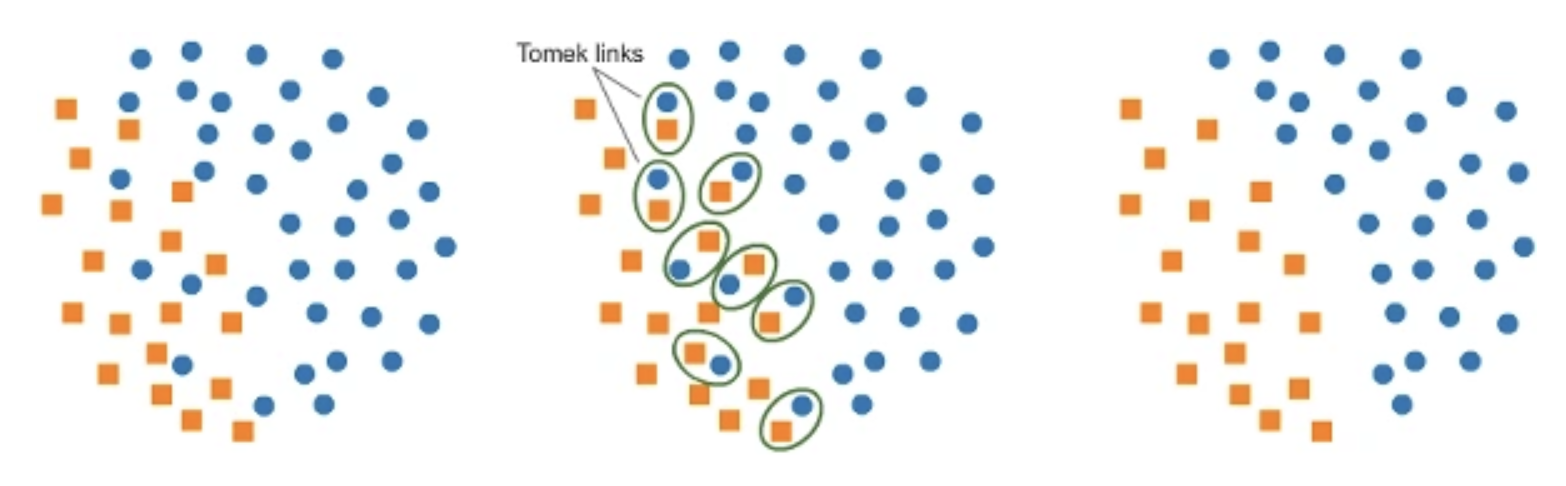

In [68]:
from imblearn.under_sampling import TomekLinks

print(f"Shape before down-sampling: {X_train_processed.shape}")

# Apply Tomek Links undersampler
X_train_processed, y_train = TomekLinks(sampling_strategy='auto').fit_resample(X_train_processed, y_train)
print(f"Shape before down-sampling: {X_train_processed.shape}")


Minority Over-sampling Via SMOTE

---



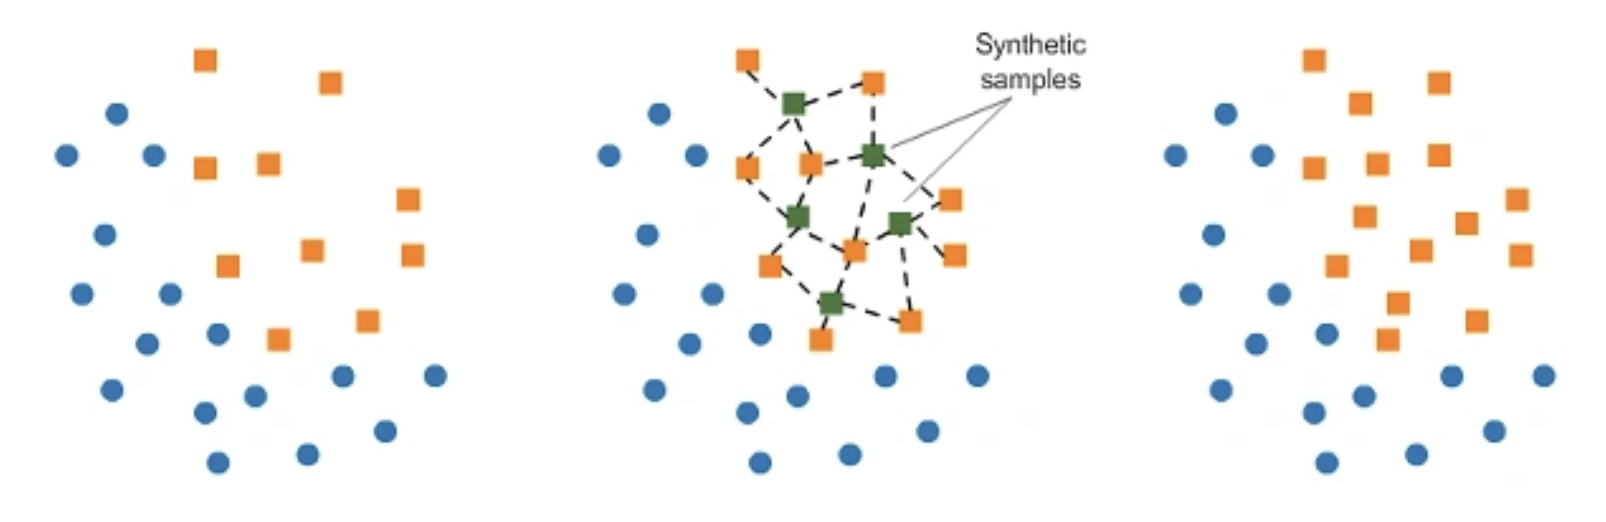

In [63]:
from imblearn.over_sampling import SMOTE

print(f"Shape before up-sampling: {X_train_processed.shape}")

# Apply SMOTE oversampler
X_train_processed, y_train = SMOTE(sampling_strategy='auto').fit_resample(X_train_processed, y_train)
print(f"Shape after up-sampling: {X_train_processed.shape}")


Shape before up-sampling: (176400, 15)
Shape after up-sampling: (309360, 15)


# Gradient Boosting Machine

---



Implemented using either the XGBoost or LightGBM framework

In [64]:
# Parameter space for gradient boosting classifier
gb_params = {
    'n_estimators': [10, 50, 100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2, 1],
    'max_depth': [3, 5, 7, 10, 15, 20, 25, 30],
    'min_child_weight': [1, 3, 5, 10, 15],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.1, 0.3, 0.5, 0.8, 1.0],
    'min_samples_leaf': [3]
}


Select Boosting Framework
---



In [68]:
frame_work = 'lightgbm' # xgboost, lightgbm

gb_model = None

if frame_work == 'xgboost':
  import xgboost as xgb
  scale_pos_weight = np.sum(y_train == 0) / np.sum(y_train == 1)

  # Define XGBoost classifier
  gb_model = xgb.XGBClassifier(
      use_label_encoder = False,
      eval_metric       = 'logloss',
      scale_pos_weight  = scale_pos_weight, # Handles class imbalance
      random_state      = 1234
  )

elif frame_work == 'lightgbm':
  import lightgbm as lgb

  # Define LightGBM model
  gb_model = lgb.LGBMClassifier(
      boosting_type = 'gbdt',
      objective     = 'binary',  # for binary classification
      class_weight  = 'balanced',  # Handles class imbalance
      random_state  = 1234,
      n_jobs        = -1
  )


In [69]:
from sklearn.model_selection import RandomizedSearchCV

gb_random_search = RandomizedSearchCV(
    estimator           = gb_model,
    param_distributions = gb_params,
    n_iter              = 40,  # Number of random combinations to try
    scoring             = 'f1',
    cv                  = StratifiedKFold(n_splits=3),
    n_jobs              = -1,
    verbose             = 1,
    random_state        = 1234
)

gb_random_search.fit(X_train_processed, y_train)


Fitting 3 folds for each of 40 candidates, totalling 120 fits


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=3. Current value: min_data_in_leaf=3
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=3. Current value: min_data_in_leaf=3
[LightGBM] [Info] Number of positive: 154680, number of negative: 154680
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.028531 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2430
[LightGBM] [Info] Number of data points in the train set: 309360, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


RandomizedSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
                   estimator=LGBMClassifier(class_weight='balanced', n_jobs=-1,
                                            objective='binary',
                                            random_state=1234),
                   n_iter=40, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.1, 0.3, 0.5, 0.8,
                                                             1.0],
                                        'learning_rate': [0.01, 0.1, 0.2, 1],
                                        'max_depth': [3, 5, 7, 10, 15, 20, 25,
                                                      30],
                                        'min_child_weight': [1, 3, 5, 10, 15],
                                        'min_samples_leaf': [3],
                                        'n_estimators': [10, 50, 100, 200, 300],
                                        'subsample': [0.6, 0.8, 1.0]},
                   random_state=1234, scoring='f1', verbose=1)

Search Output

---



In [67]:

print(f"Best GridSearch f1 Score: {gb_random_search.best_score_:.2f}")
print(f"------------------------")
print(f"Best GridSearch Parameters:")
print(f"---------------------------")
gb_random_search.best_params_


Best GridSearch f1 Score: 0.93
------------------------
Best GridSearch Parameters:
---------------------------


{'subsample': 1.0,
 'n_estimators': 100,
 'min_samples_leaf': 3,
 'min_child_weight': 1,
 'max_depth': 10,
 'learning_rate': 1,
 'colsample_bytree': 0.5}

Feature Importance Analysis (GB Model)

---



<ipython-input-95-d0ab6ef3d8ce>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importance_df, x="Importance", y="Feature", palette="viridis")


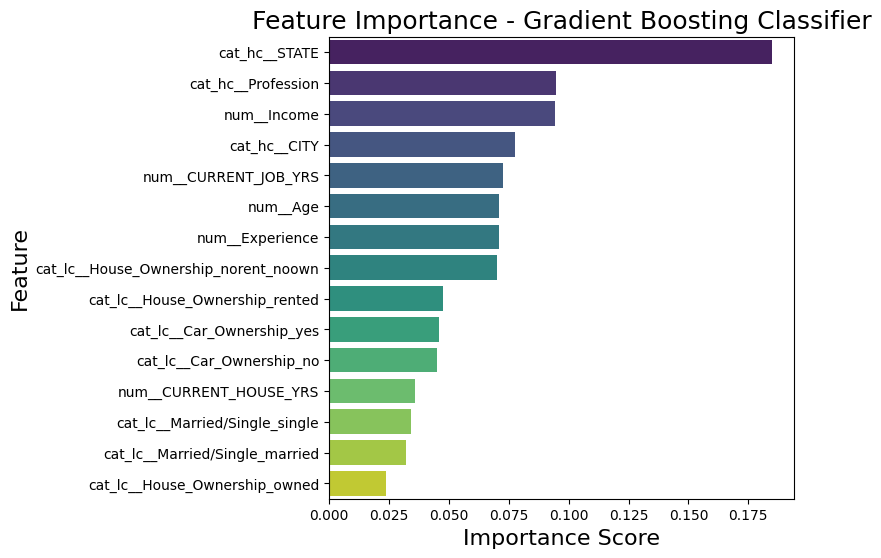

In [95]:

gb_importances = gb_random_search.best_estimator_.feature_importances_
feature_names  = preprocessor.get_feature_names_out()

# Create DataFrame for Visualization
importance_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": gb_importances
}).sort_values(by="Importance", ascending=False)

# Plot Feature Importances
plt.figure(figsize=(6, 6))
sns.barplot(data=importance_df, x="Importance", y="Feature", palette="viridis")
plt.title("Feature Importance - Gradient Boosting Classifier", fontsize = 18)
plt.xlabel("Importance Score", fontsize = 16)
plt.ylabel("Feature", fontsize = 16)
plt.show()


Save Tuned GB Model to File

---



In [96]:
import os
import pickle
log_dir = '/content/drive/Shareddrives/AI for Financial Modeling Group 6/Module 3'

# Save training history to pickle
filename   = 'trained_GB_classifier.pkl'
model_path = os.path.join(log_dir, filename)

with open(model_path, 'wb') as f:
    pickle.dump(gb_random_search, f)


# Random Forest Classifer

---



In [65]:
# Parameter space for random forest classifier
rf_params = {
    'n_estimators': [50, 100],      # Number of trees
    'max_depth': [None, 10, 20, 25, 30],      # Maximum depth per tree
    'min_samples_split': [5, 8, 12, 15],      # Minimum samples needed to split a node
    'min_samples_leaf': [3],        # Minimum samples required in a leaf node
    'max_features': ['sqrt', 'log2'],     # Number of features to consider at each split
    'bootstrap': [True, False]            # Whether to use bootstrapping
}

Perform Randomized Search to Optimize RF Model Parameters

---



In [ ]:
# Define random forest model
rf_model = RandomForestClassifier(class_weight='balanced_subsample', random_state = 1234)

# Search RF parameter space
rf_randomsearch = RandomizedSearchCV(
    estimator           = rf_model,
    param_distributions = rf_params,
    n_iter              = 20,  # Number of random parameter combinations to try
    scoring             = 'f1',
    cv                  = StratifiedKFold(n_splits=3),
    n_jobs              = -1,
    verbose             = 1,
    random_state        = 1234
)

rf_randomsearch.fit(X_train_processed, y_train)


Search Output

---



In [ ]:
# Print search results
print(f"Best GridSearch f1 Score: {rf_randomsearch.best_score_:.2f}")
print(f"------------------------")
print(f"Best GridSearch Parameters:")
print(f"---------------------------")
rf_randomsearch.best_params_


Best GridSearch f1 Score: 0.52
------------------------
Best GridSearch Parameters:
---------------------------


{'max_depth': 20,
 'max_features': 0.4,
 'min_samples_leaf': 2,
 'n_estimators': 20}

Feature Importance Analysis (RF Model)

---



<ipython-input-51-8bf1eff9a3fd>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importance_df, x="Importance", y="Feature", palette="viridis")


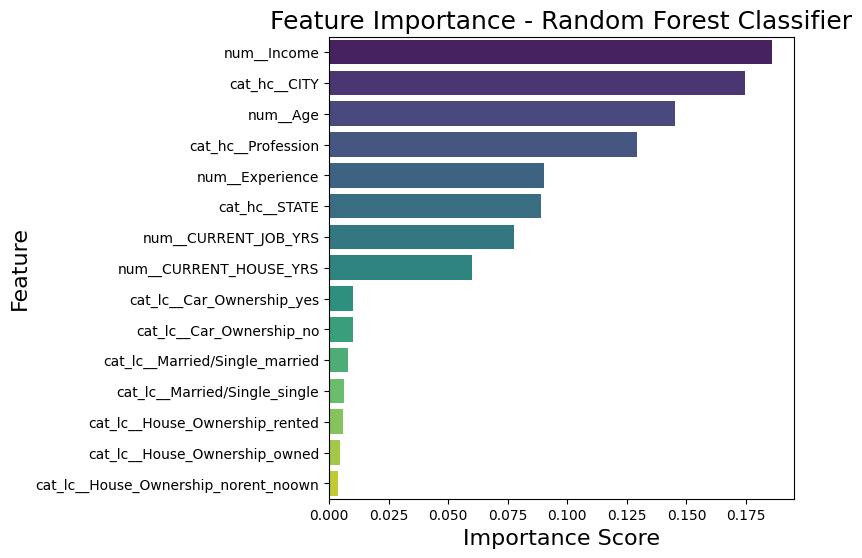

In [ ]:

rf_importances = rf_randomsearch.best_estimator_.feature_importances_
feature_names  = preprocessor.get_feature_names_out()

# Create DataFrame for Visualization
importance_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": rf_importances
}).sort_values(by="Importance", ascending=False)

# Plot Feature Importances
plt.figure(figsize=(6, 6))
sns.barplot(data=importance_df, x="Importance", y="Feature", palette="viridis")
plt.title("Feature Importance - Random Forest Classifier", fontsize = 18)
plt.xlabel("Importance Score", fontsize = 16)
plt.ylabel("Feature", fontsize = 16)
plt.show()



Save Tuned RF Model to File

---



In [ ]:
import os
import pickle
log_dir = '/content/drive/Shareddrives/AI for Financial Modeling Group 6/Module 3'

# Save training history to pickle
filename = 'trained_RF_classifier.pkl'
model_path = os.path.join(log_dir, filename)

with open(model_path, 'wb') as f:
    pickle.dump(rf_randomsearch, f)


In [ ]:
import os
import pickle
log_dir = '/content/drive/Shareddrives/AI for Financial Modeling Group 6/Module 3'

# Save training history to pickle
filename   = 'trained_GB_classifier.pkl'
model_path = os.path.join(log_dir, filename)

with open(model_path, 'wb') as f:
    pickle.dump(gb_random_search, f)


# SVM Classifer

---



In [37]:
# Parameter space for SVM classifier

svm_params = {
    'C': [0.1, 1, 10, 100],            # Regularization strength
    'kernel': ['linear', 'rbf', 'poly'],  # Kernel type
    'gamma': ['scale', 'auto', 0.01, 0.1, 1],  # Kernel coefficient
    'degree': [2, 3, 4]  # Only relevant for the 'poly' kernel
}

Perform Randomized Search to Optimize SVM Model Parameters

---



In [ ]:
from sklearn.model_selection import RandomizedSearchCV
# Define SVM model
from sklearn.svm import SVC

# Define SVM classifier
svm_model = SVC(probability  = True,
                class_weight = 'balanced',
                random_state = 1234)

svm_random_search = RandomizedSearchCV(
    estimator           = svm_model,
    param_distributions = svm_params,
    n_iter              = 20,  # Number of parameter combinations to try
    scoring             = 'f1',
    cv                  = StratifiedKFold(n_splits=3),
    n_jobs              = -1,
    verbose             = 1,
    random_state        = 1234
)

# Fit the RandomizedSearchCV on the training data
svm_random_search.fit(X_train_processed, y_train)


Search Output

---



In [ ]:
# Print search results
print(f"Best GridSearch f1 Score: {svm_random_search.best_score_:.2f}")
print(f"------------------------")
print(f"Best GridSearch Parameters:")
print(f"---------------------------")
svm_random_search.best_params_


Best GridSearch f1 Score: 0.52
------------------------
Best GridSearch Parameters:
---------------------------


{'max_depth': 20,
 'max_features': 0.4,
 'min_samples_leaf': 2,
 'n_estimators': 20}

Feature Importance Analysis (SVM Model)

---



<ipython-input-51-8bf1eff9a3fd>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importance_df, x="Importance", y="Feature", palette="viridis")


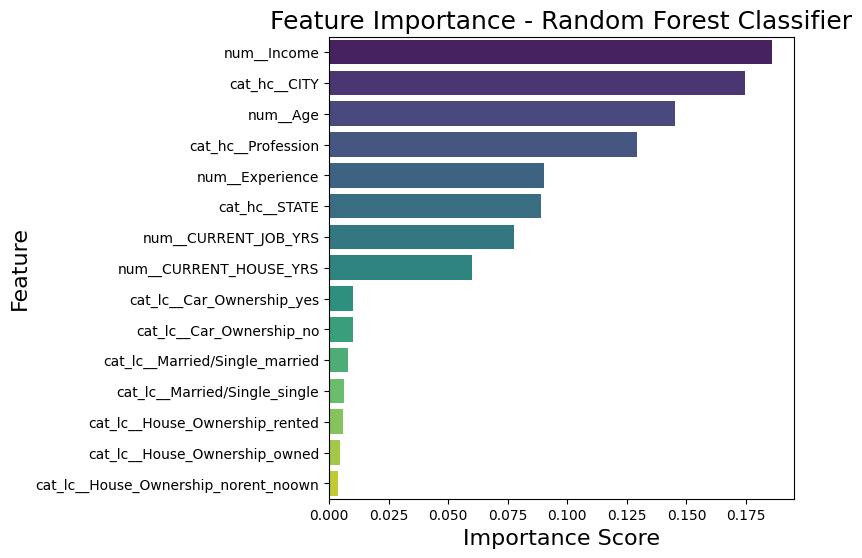

In [ ]:

svm_importances = svm_random_search.best_estimator_.feature_importances_
feature_names  = preprocessor.get_feature_names_out()

# Create DataFrame for Visualization
importance_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": svm_importances
}).sort_values(by="Importance", ascending=False)

# Plot Feature Importances
plt.figure(figsize=(6, 6))
sns.barplot(data=importance_df, x="Importance", y="Feature", palette="viridis")
plt.title("Feature Importance - Random Forest Classifier", fontsize = 18)
plt.xlabel("Importance Score", fontsize = 16)
plt.ylabel("Feature", fontsize = 16)
plt.show()



Save Tuned SVM Model to File

---



In [1]:
import os
import pickle
log_dir = '/content/drive/Shareddrives/AI for Financial Modeling Group 6/Module 3'

# Save training history to pickle
filename = 'trained_SVM_classifier.pkl'
model_path = os.path.join(log_dir, filename)

with open(model_path, 'wb') as f:
    pickle.dump(rf_randomsearch, f)


FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/Shareddrives/AI for Financial Modeling Group 6/Module 3/trained_SVM_classifier.pkl'

# Model Comparison

---



In [61]:
import pandas as pd

# Compare performance metrics of all trained models
model_performance = pd.DataFrame({
    "Metric": ["F1-score"],
    "DecisionTree": dt_gridsearch.best_score_,
    "RandomForest": rf_gridsearch.best_score_,
    "GradientBoosting": gb_gridsearch.best_score_
})

# model_performance = pd.melt(model_performance, id_vars=["Metric"], var_name="Model", value_name="Score")

plt.figure(figsize=(4, 7))
# sns.barplot(model_performance, x="Metric", y="Score", hue="Model", gap=0.05, palette = "viridis")
ax = sns.barplot(model_performance, gap=0.05, palette = "plasma")

plt.title("Model Performance Comparison",fontsize=18)
plt.ylabel("F1-Score", fontsize=16)
plt.xlabel("Model",fontsize=16)
plt.xticks(rotation=45)
ax.tick_params(labelsize=14)

f1_scores = [dt_gridsearch.best_score_, rf_gridsearch.best_score_, gb_gridsearch.best_score_]
# Show labels on bars
for i, value in enumerate(f1_scores):
  plt.text(i, value + 0.01, f"{value:.2f}", ha="center", fontsize=12, color='darkred')
plt.show()


NameError: name 'dt_gridsearch' is not defined

# Best Model (Based on F1-Score)

---



Load Tuned Model and Predict Test Data

---



In [34]:
import os
import pickle
log_dir = '/content/drive/Shareddrives/AI for Financial Modeling Group 6/Module 3'

# Load training history from file
filename   = 'trained_GB_classifier.pkl' # trained_SVM_classifier, trained_GB_classifier
model_path = os.path.join(log_dir, filename)

with open(model_path, 'rb') as f:
    gb_model = pickle.load(f)


Evaluate Model Performance

---



In [35]:
from sklearn.metrics import log_loss, accuracy_score, f1_score

# Model Performance Evaluation
y_preds_gb       = gb_model.predict(X_test_processed) # predict class labels
y_proba_preds_gb = gb_model.predict_proba(X_test_processed) # predict class probabilities

pred_loss = log_loss(y_true=y_test, y_pred=y_proba_preds_gb)
pred_acc  = accuracy_score(y_test, y_preds_gb)
pred_f1   = f1_score(y_test, y_preds_gb, average='weighted') # Computes F1 per class, then weights by the number of true instances per class. Best for imbalanced data.

print(f'Model Log Loss on Test Data: {pred_loss:.4f}')
print(f"----------------------------")
print(f'Model Accuracy on Test Data: {100*pred_acc:.2f}%')
print(f"----------------------------")
print(f'Model F1 Score on Test Data: {pred_f1:.4f}')


Model Log Loss on Test Data: 0.2723
----------------------------
Model Accuracy on Test Data: 89.69%
----------------------------
Model F1 Score on Test Data: 0.9036


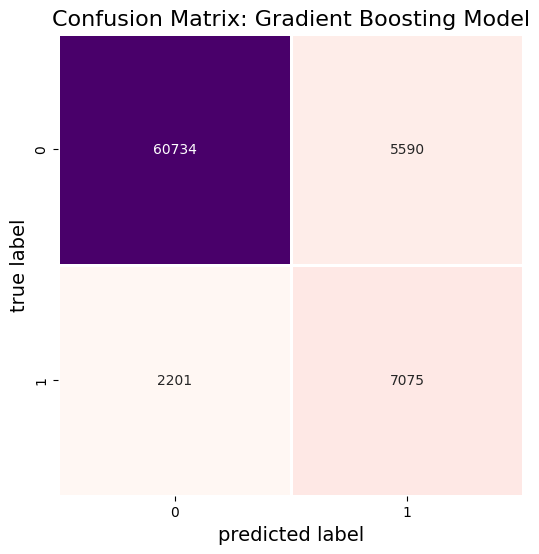

In [36]:
# Plot Confusion Matrix
plot_confusion_matrix(y_test, y_preds_gb, model_name = "Gradient Boosting", col_map='RdPu')
